In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(color_codes=True)
df_p1 = pd.read_csv("./report_prob1.csv")

In [42]:
df_p1['nums_nlogn_10'] = df_p1['nums'] * np.log10(df_p1['nums'])
df_p1['nums_nlogn_2'] = df_p1["nums"].apply(lambda x: x * np.log2(x))

In [43]:
df_p1

,nums,command,mean,stddev,median,user,system,min,max,nums_nlogn_10,nums_nlogn_2
0,10,./main < seq_tmp.txt,0.002122,0.001598,0.002048,0.001595,0.001020,0.000000,0.005337,1.000000e+01,3.321928e+01
1,11,./main < seq_tmp.txt,0.002557,0.001596,0.002949,0.002006,0.001052,0.000000,0.005329,1.145532e+01,3.805375e+01
2,12,./main < seq_tmp.txt,0.002703,0.001797,0.002826,0.002204,0.001080,0.000000,0.007824,1.295017e+01,4.301955e+01
3,13,./main < seq_tmp.txt,0.001927,0.001615,0.001408,0.001641,0.000908,0.000000,0.005442,1.448126e+01,4.810572e+01
4,14,./main < seq_tmp.txt,0.002216,0.001641,0.002278,0.001720,0.001068,0.000000,0.005577,1.604579e+01,5.330297e+01
...,...,...,...,...,...,...,...,...,...,...,...
634,9600000,./main < seq_tmp.txt,3.103203,0.015826,3.101530,2.694950,0.403975,3.080371,3.130455,6.702980e+07,2.226682e+08
635,9700000,./main < seq_tmp.txt,3.157585,0.094812,3.136101,2.756303,0.396618,3.096793,3.420077,6.777169e+07,2.251327e+08
636,9800000,./main < seq_tmp.txt,3.176006,0.015029,3.178919,2.734883,0.436548,3.155280,3.204417,6.851402e+07,2.275986e+08
637,9900000,./main < seq_tmp.txt,3.197340,0.018925,3.193439,2.784101,0.408614,3.175601,3.238107,6.925679e+07,2.300661e+08


In [44]:
from scipy import stats
r_value_n = stats.linregress(df_p1['nums'],df_p1['mean'])[2]
r_value_nlogn_2 = stats.linregress(df_p1['nums_nlogn_2'],df_p1['mean'])[2]
r_value_nlogn_10 = stats.linregress(df_p1['nums_nlogn_10'],df_p1['mean'])[2]

r_value**2, r_value_nlogn_2**2, r_value_nlogn_10**2

(0.9992603824726844, 0.9996423897196581, 0.9996423897196579)

Text(0, 0.5, 'Tempo (s)')

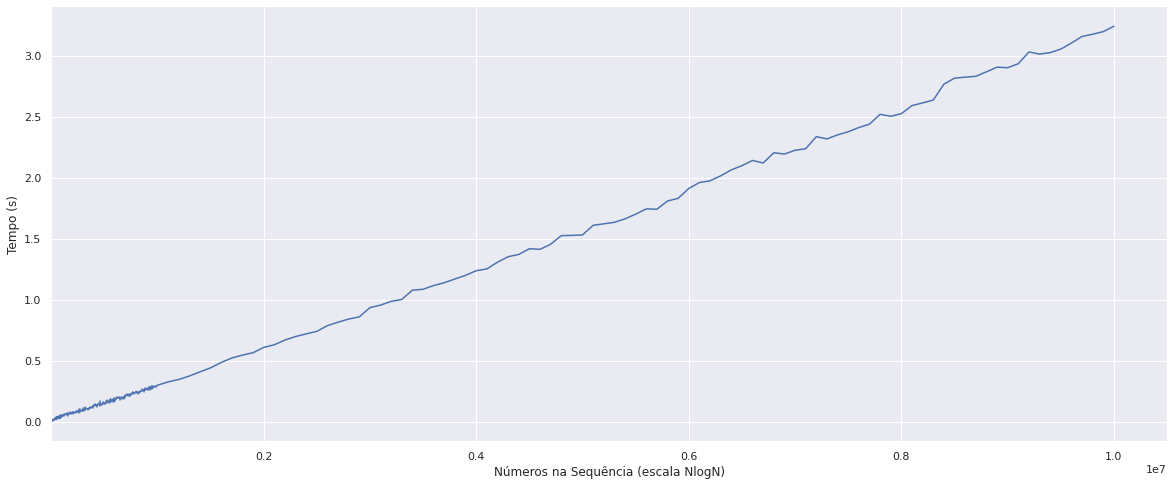

In [45]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="nums", y="mean", data=df_p1, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("Números na Sequência (escala NlogN)")
ax.set_ylabel("Tempo (s)")
#ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))